
##**I. Sum of two digits**

> ### **C++**

In [49]:
%%writefile main.cpp
#include <iostream>

using namespace std;

int sumNum(int a, int b)
{
  return a+b;
} 

int main()
{
    int a,b;
    cin>>a>>b;
    cout<<sumNum(a,b);
    return 0;
}

Writing main.cpp


In [50]:
!g++ main.cpp -o main
!./main

8 7
15

 ### **Test files:**

 Test 1 (valor erroneo en el archivo de salida).

*Input file:*

In [ ]:
%%writefile test1.in
8 -2

Overwriting test1.in


*Output file:*

In [ ]:
%%writefile test1.out
3 #Poniendo un valor incorrecto en el archivo de salida (la respuesta es 6)

Overwriting test1.out


*Test 1 Execution (Using `grep`)*

La respuesta me muestra en pantalla el valor cuando el archivo de salida `test1.out` no tiene el valor correcto.

In [ ]:
!./main <test1.in> result.out
!grep -xvFf test1.out result.out


6


Test 2 (valores de entredada y salida correctos)

*Input files*

In [ ]:
%%writefile test2.in
12 9


Overwriting test2.in


*Output files*

In [ ]:
%%writefile test2.out
21

Writing test2.out


Test 2 Execution (using **`grep`**)

*Al coincidir los datos de entrada con la salida de los archivos, no hay impresión en pantalla. Correcto.*

In [ ]:
!./main <test2.in> result.out
!grep -xvFf test2.out result.out

Test 3 (Ambos valores negativos) \\
*Input files*

In [ ]:
%%writefile test3.in
-3 -13

Writing test3.in


*Output files* 

In [ ]:
%%writefile test3.out 
-16

Writing test3.out


Test 3 Execution (Using **grep**)

In [ ]:
!./main <test3.in> result.out
!grep -xvFf test3.out result.out

In [ ]:
!./main <test1.in


6

> ### **Python**

In [ ]:
%%writefile mainPy.py
def sumNum(a,b):
  return a+b

a,b= map(int,input().split())
print(sumNum(a,b))

Writing mainPy.py


Executing text 1 in Python

*Input file* 

In [ ]:
%%writefile testPy1.in
12 -8 

Writing testPy1.in


*Output file*

In [ ]:
%%writefile testPy1.out
4

Writing testPy1.out


*Executing test1 in Python*

In [ ]:
!./main <testPy1.in> result.out
!grep -xvFf testPy1.out result.out

Executing test 2 in Python

*Input file*

In [ ]:
%%writefile testPy2.in
8 3

Writing testPy2.in


Output file (wrong answer)

In [ ]:
%%writefile testPy2.out
15

Overwriting testPy2.out


Executing test 2 in Python

*Muestra en pantalla el resultado correcto.*

In [ ]:
!./main <testPy2.in> result.out
!grep -xvFf testPy2.out result.out

11


Test 3 in Python

*Input file*

In [ ]:
%%writefile testPy3.in
-15 -4

Overwriting testPy3.in


>>> Output file

In [ ]:
%%writefile testPy3.out
-19

Writing testPy3.out


Executing test 3 in Python

In [ ]:
!./main <testPy3.in> result.out
!grep -xvFf testPy3.out result.out

## **II. Maximun Pairwise Product**

> #### *Naive algorithm*

>> ### **C++**

In [58]:
%%writefile maxPairWiseProdAlg1.cpp

#include <iostream>
#include <vector>
#include <algorithm>

using namespace std;

int maxPairWiseProduct(const vector<int>& numbers)
{
    int product= 0;
    int n = numbers.size();
 
    for(int i=0; i<n; ++i)
    {
        for(int j=i+1; j<n ; ++j)
        {
            product = max(product, numbers[i]*numbers[j]);
        }
    }
    return product;
}

int main()
{
    int n;
    cin>>n;
    vector<int> numbers(n);
    for(int i=0; i<n; ++i)
    {
        cin>> numbers[i];
    }
 
    cout<<maxPairWiseProduct(numbers)<<"\n";
    return 0;

}

Writing maxPairWiseProdAlg1.cpp


In [59]:
%%time
!g++ maxPairWiseProdAlg1.cpp -o run
!./run

5
8 4 6 5 9
72
CPU times: user 928 ms, sys: 121 ms, total: 1.05 s
Wall time: 2min 44s


**Edge Case**

In [73]:
%%writefile edgeCase.in
6
200000 4 7 200000 8 9

Overwriting edgeCase.in


*Result:*

In [61]:
%time
!./run <edgeCase.in

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.82 µs
1345294336


>### **Python**

In [62]:
%%writefile maxPairWiseProdAlg1.py
n = int(input())
a = [int(x) for x in input().split()]

product = 0

for i in range(n):
  for j in range(i+1, n):
    product = max(product, a[i]*a[j])

print(product)

Writing maxPairWiseProdAlg1.py


In [63]:
%%time
!python maxPairWiseProdAlg1.py 

4
7 11 5 4
77
CPU times: user 166 ms, sys: 28.4 ms, total: 195 ms
Wall time: 26.6 s


**Edge case in Python:**

In [64]:
%time
!python maxPairWiseProdAlg1.py < edgeCase.in

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.25 µs
40000000000


#### *Fast Algorithm*
> ### **C++**

In [65]:
%%writefile maxPairWiseProdAlg2.cpp

#include <iostream>
#include <vector>
#include <algorithm>

using namespace std;

void maxPairwiseProductFast(int n, vector<long long> &number)
{
    sort(number.begin(), number.end());
    if(number[n-1]== number[n-2])
    {
        cout<< number[n-1]*number[n-3]<<endl;
    }   
    else
    {
        cout<< number[n-1]*number[n-2]<<endl;
    }
}

int main()
{
    int n;
    cin>>n;
    vector<long long> numbers(n);
    for(int i=0; i<n; i++)
    {
        cin>> numbers[i];
    }
 
    sort(numbers.begin(), numbers.end());
 
    maxPairwiseProductFast(n, numbers);
    return 0;
}


Overwriting maxPairWiseProdAlg2.cpp


In [66]:
!g++ maxPairWiseProdAlg2.cpp -o run
!./run

5

12 8 1 5 12 
96


***EdgeCase Test***

Aqui usamos nuevamente el archivo `edgeCase.in` creado en el pasado con entradas: \\
`6`

`200000 4 7 200000 8 9` 

In [67]:
%time
!./run < edgeCase.in

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 9.54 µs
1800000


> ### **Python**

In [68]:
%%writefile maxPairWiseProdAlg2.py

def maxPairwiseProductFast(n,a):
  a.sort()
  if a[n-2] == a[n-1]:
    print(a[n-3]*a[n-1])
  else:
    print(a[n-2]*a[n-1])


n = int(input())
a = [int(x) for x in input().split()]

maxPairwiseProductFast(n,a)


Overwriting maxPairWiseProdAlg2.py


In [69]:
!python maxPairWiseProdAlg2.py

5
8 4 1 2 8
32


**EdgeCase Test Python**


Mismo archivo anteriormente mencionado.

In [72]:
%time
!python maxPairWiseProdAlg2.py < edgeCase.in

CPU times: user 0 ns, sys: 4 µs, total: 4 µs
Wall time: 9.78 µs
1800000


# **Screenshots Week 1 - Coursera**

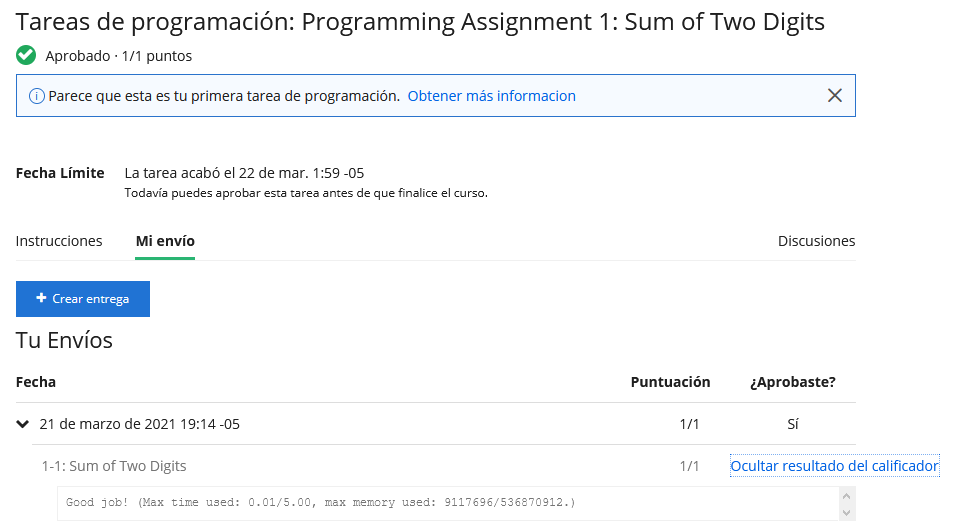




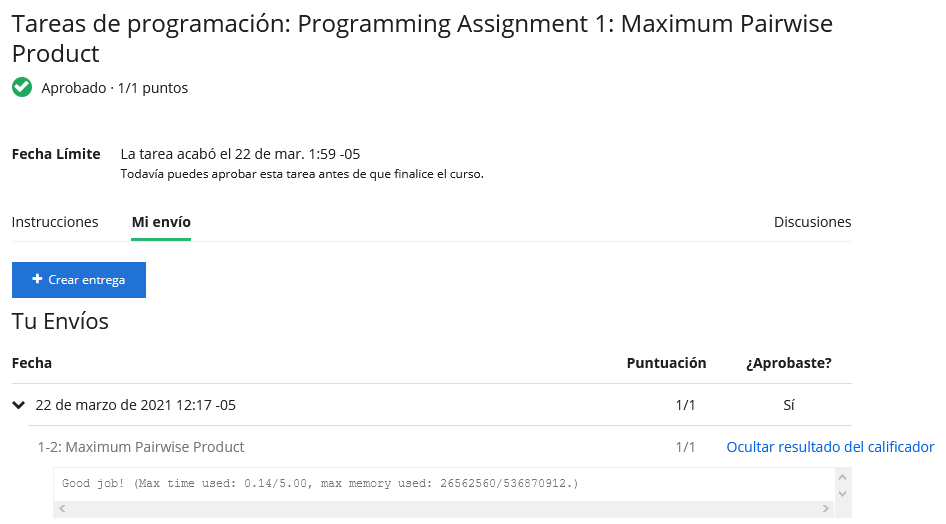